<a href="https://colab.research.google.com/github/anjali88/Data-Science/blob/master/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

from math import sqrt
from sklearn import  metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [274]:
from google.colab import files
uploaded = files.upload()

Saving processed-cleveland-data.xlsx to processed-cleveland-data (5).xlsx


In [275]:
import io
data = pd.read_excel(io.BytesIO(uploaded['processed-cleveland-data.xlsx']))
print(data)

     Age  Sex  CP  TRESTTBPS  CHOL  FBS  ...  EXANG  OLDPEAK  SLOPE   CA  THAL NUM
0     63    1   1        145   233    1  ...      0      2.3      3  0.0   6.0   0
1     67    1   4        160   286    0  ...      1      1.5      2  3.0   3.0   2
2     67    1   4        120   229    0  ...      1      2.6      2  2.0   7.0   1
3     37    1   3        130   250    0  ...      0      3.5      3  0.0   3.0   0
4     41    0   2        130   204    0  ...      0      1.4      1  0.0   3.0   0
..   ...  ...  ..        ...   ...  ...  ...    ...      ...    ...  ...   ...  ..
298   45    1   1        110   264    0  ...      0      1.2      2  0.0   7.0   1
299   68    1   4        144   193    1  ...      0      3.4      2  2.0   7.0   2
300   57    1   4        130   131    0  ...      1      1.2      2  1.0   7.0   3
301   57    0   2        130   236    0  ...      0      0.0      2  1.0   3.0   1
302   38    1   3        138   175    0  ...      0      0.0      1    ?   3.0   0

[30

In [276]:
data.keys()

Index(['Age', 'Sex', 'CP', 'TRESTTBPS', 'CHOL', 'FBS', 'RESTECG', 'THALACH',
       'EXANG', 'OLDPEAK', 'SLOPE', 'CA', 'THAL', 'NUM'],
      dtype='object')

In [277]:
data.describe()

,Age,Sex,CP,TRESTTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,NUM
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [278]:
print("The data shape is:")
print (data.shape)
print("\n")
print("The data info")
print (data.info())

The data shape is:
(303, 14)


The data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   CP         303 non-null    int64  
 3   TRESTTBPS  303 non-null    int64  
 4   CHOL       303 non-null    int64  
 5   FBS        303 non-null    int64  
 6   RESTECG    303 non-null    int64  
 7   THALACH    303 non-null    int64  
 8   EXANG      303 non-null    int64  
 9   OLDPEAK    303 non-null    float64
 10  SLOPE      303 non-null    int64  
 11  CA         303 non-null    object 
 12  THAL       303 non-null    object 
 13  NUM        303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB
None


In [279]:
 # remove rows with nonsense data, like '?'
  indexNames = data[ (data['CA'] == '?') | (data['THAL'] == '?')].index
  # Delete these row indexes from dataFrame
  data.drop(indexNames , inplace=True)
  data.shape

(297, 14)

#Explotary Data analysis (EDA)

In [0]:
# Density Plot
def densityPlot(column, hist, kde):
  sns.kdeplot(data[column],bw=1.5)

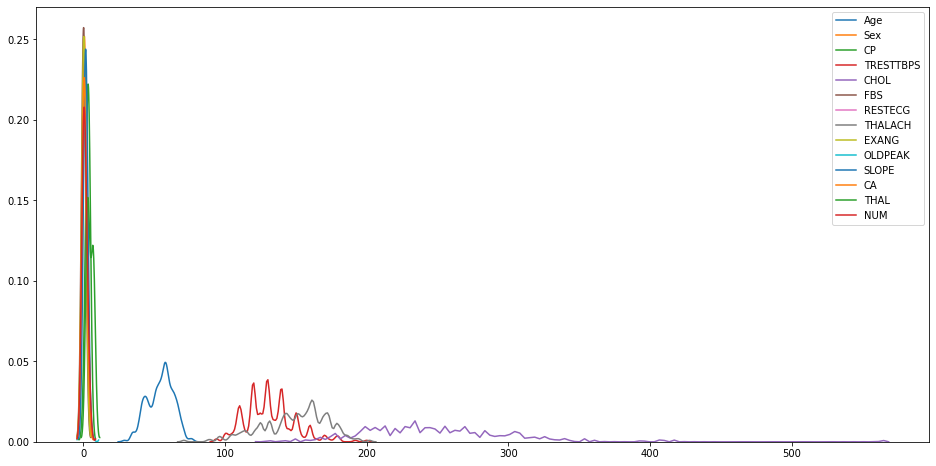

In [281]:
columns = ['Age', 'Sex', 'CP', 'TRESTTBPS', 'CHOL', 'FBS', 'RESTECG', 'THALACH',
       'EXANG', 'OLDPEAK', 'SLOPE', 'CA', 'THAL', 'NUM']
plt.figure(figsize=(16,8))
for column in columns:
  densityPlot(column, True, True)

Text(0, 0.5, 'Number of Patients')

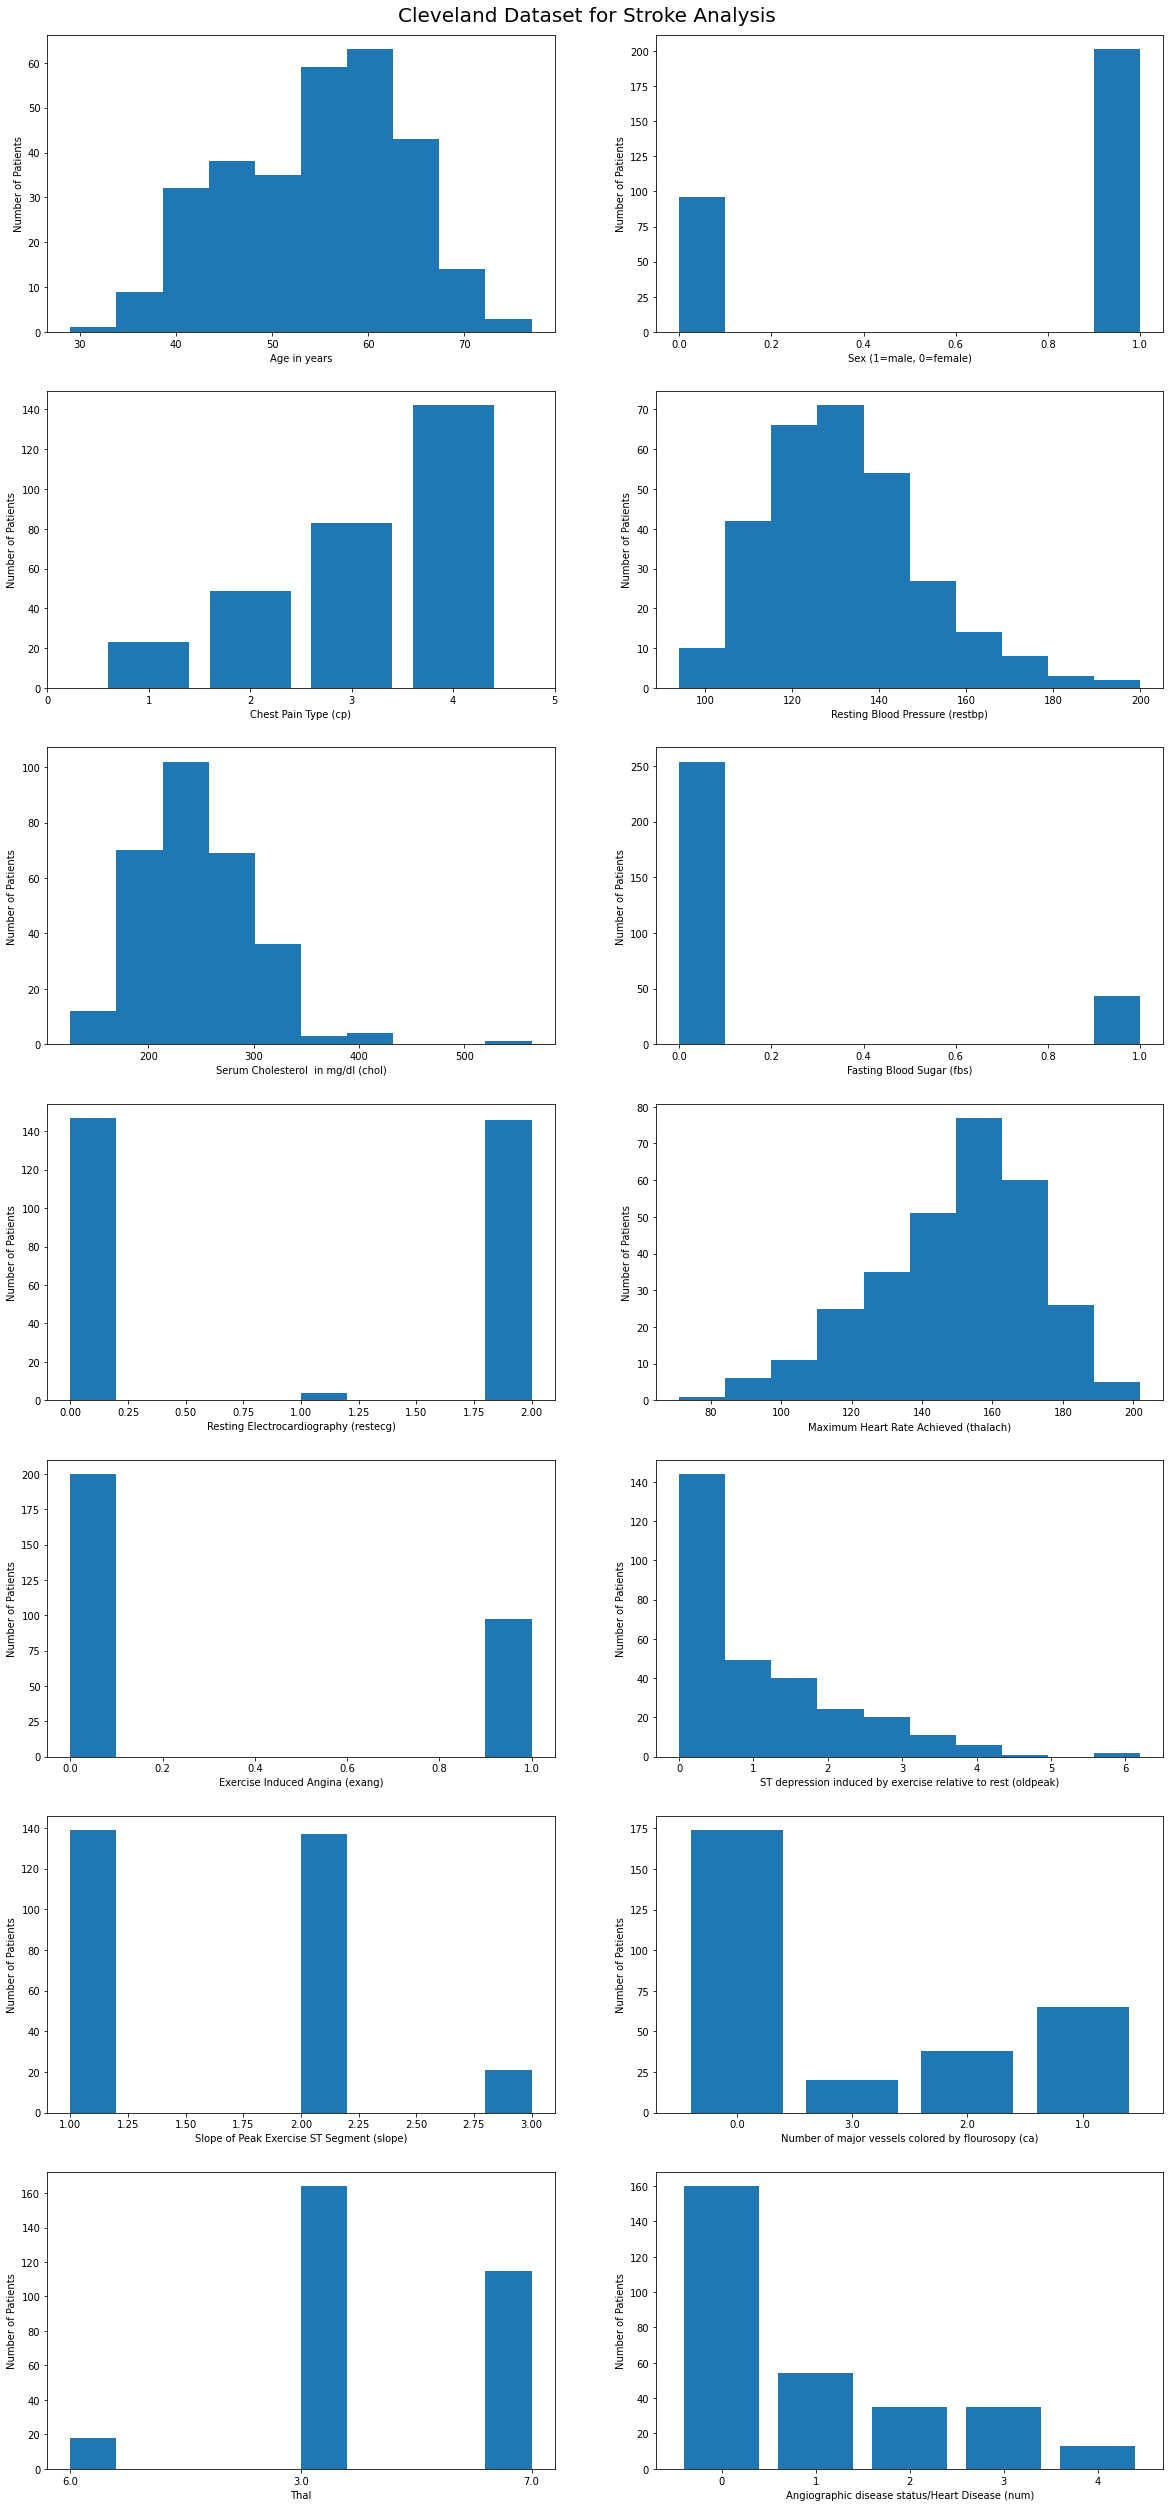

In [282]:
fig, axes = plt.subplots( nrows=7, ncols=2, figsize=(20,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Cleveland Dataset for Stroke Analysis", fontsize=20)

axes[0,0].hist(data.Age)
axes[0,0].set_xlabel("Age in years")
axes[0,0].set_ylabel("Number of Patients")

axes[0,1].hist(data.Sex)
axes[0,1].set_xlabel("Sex (1=male, 0=female)")
axes[0,1].set_ylabel("Number of Patients")

axes[1,0].hist(data.CP,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[1,0].set_xlim(0.0,5.0)
axes[1,0].set_xlabel("Chest Pain Type (cp)")
axes[1,0].set_ylabel("Number of Patients")

axes[1,1].hist(data.TRESTTBPS)
axes[1,1].set_xlabel("Resting Blood Pressure (restbp)")
axes[1,1].set_ylabel("Number of Patients")

axes[2,0].hist(data.CHOL)
axes[2,0].set_xlabel("Serum Cholesterol  in mg/dl (chol)")
axes[2,0].set_ylabel("Number of Patients")

axes[2,1].hist(data.FBS)
axes[2,1].set_xlabel("Fasting Blood Sugar (fbs)")
axes[2,1].set_ylabel("Number of Patients")

axes[3,0].hist(data.RESTECG)
axes[3,0].set_xlabel("Resting Electrocardiography (restecg)")
axes[3,0].set_ylabel("Number of Patients")

axes[3,1].hist(data.THALACH)
axes[3,1].set_xlabel("Maximum Heart Rate Achieved (thalach)")
axes[3,1].set_ylabel("Number of Patients")

axes[4,0].hist(data.EXANG)
axes[4,0].set_xlabel("Exercise Induced Angina (exang)")
axes[4,0].set_ylabel("Number of Patients")

axes[4,1].hist(data.OLDPEAK)
axes[4,1].set_xlabel("ST depression induced by exercise relative to rest (oldpeak)")
axes[4,1].set_ylabel("Number of Patients")

axes[5,0].hist(data.SLOPE)
axes[5,0].set_xlabel("Slope of Peak Exercise ST Segment (slope)")
axes[5,0].set_ylabel("Number of Patients")

axes[5,1].hist(data.CA,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[5,1].set_xlim(-0.7,3.7)
axes[5,1].set_xlabel("Number of major vessels colored by flourosopy (ca)")
axes[5,1].set_ylabel("Number of Patients")

axes[6,0].hist(data.THAL)
axes[6,0].set_xlabel("Thal")
axes[6,0].set_ylabel("Number of Patients")

axes[6,1].hist(data.NUM,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[6,1].set_xlim(-0.7,4.7)
axes[6,1].set_xlabel("Angiographic disease status/Heart Disease (num)")
axes[6,1].set_ylabel("Number of Patients")


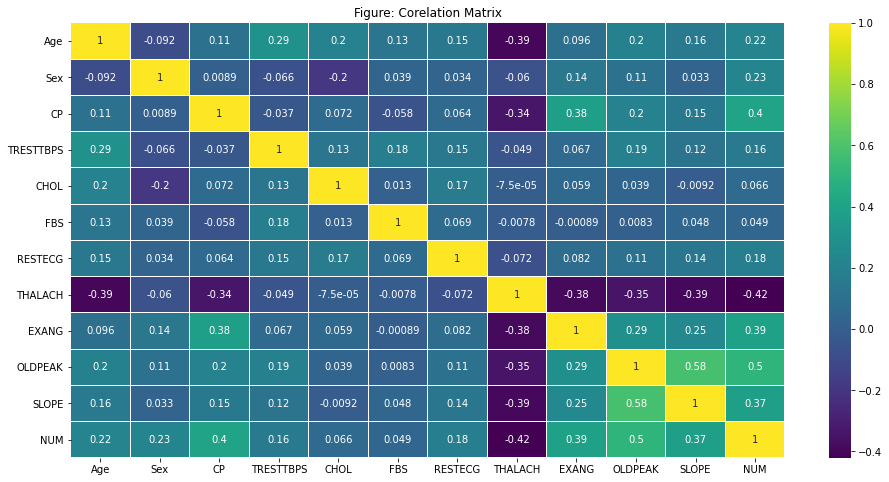

In [283]:
import seaborn as sns
plt.figure(figsize=(16,8))
cor=data.corr(method='pearson')
plt.title("Figure: Corelation Matrix")
cm=plt.cm.viridis
corr = sns.heatmap(cor,cmap=cm,linewidths=0.1,linecolor='white',annot=True)
plt.show()

In [284]:
# We will only select features which has correlation of above 0.10 (taking absolute value) with the 'PREDICTED ATTRIBUTE'. 
# Correlation with target
cor_target = abs(cor["NUM"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]
print("Relevant Features:\n")
print(relevant_features)

Relevant Features:

Age          0.222156
Sex          0.226797
CP           0.404248
TRESTTBPS    0.159620
RESTECG      0.184136
THALACH      0.420639
EXANG        0.391613
OLDPEAK      0.501461
SLOPE        0.374689
NUM          1.000000
Name: NUM, dtype: float64


In [285]:
#drop low-relevant features
data.drop(['CHOL', 'FBS', 'CA', 'THAL'], axis=1, inplace=True)
print(data.head())
print(data.shape)

   Age  Sex  CP  TRESTTBPS  RESTECG  THALACH  EXANG  OLDPEAK  SLOPE  NUM
0   63    1   1        145        2      150      0      2.3      3    0
1   67    1   4        160        2      108      1      1.5      2    2
2   67    1   4        120        2      129      1      2.6      2    1
3   37    1   3        130        0      187      0      3.5      3    0
4   41    0   2        130        2      172      0      1.4      1    0
(297, 10)


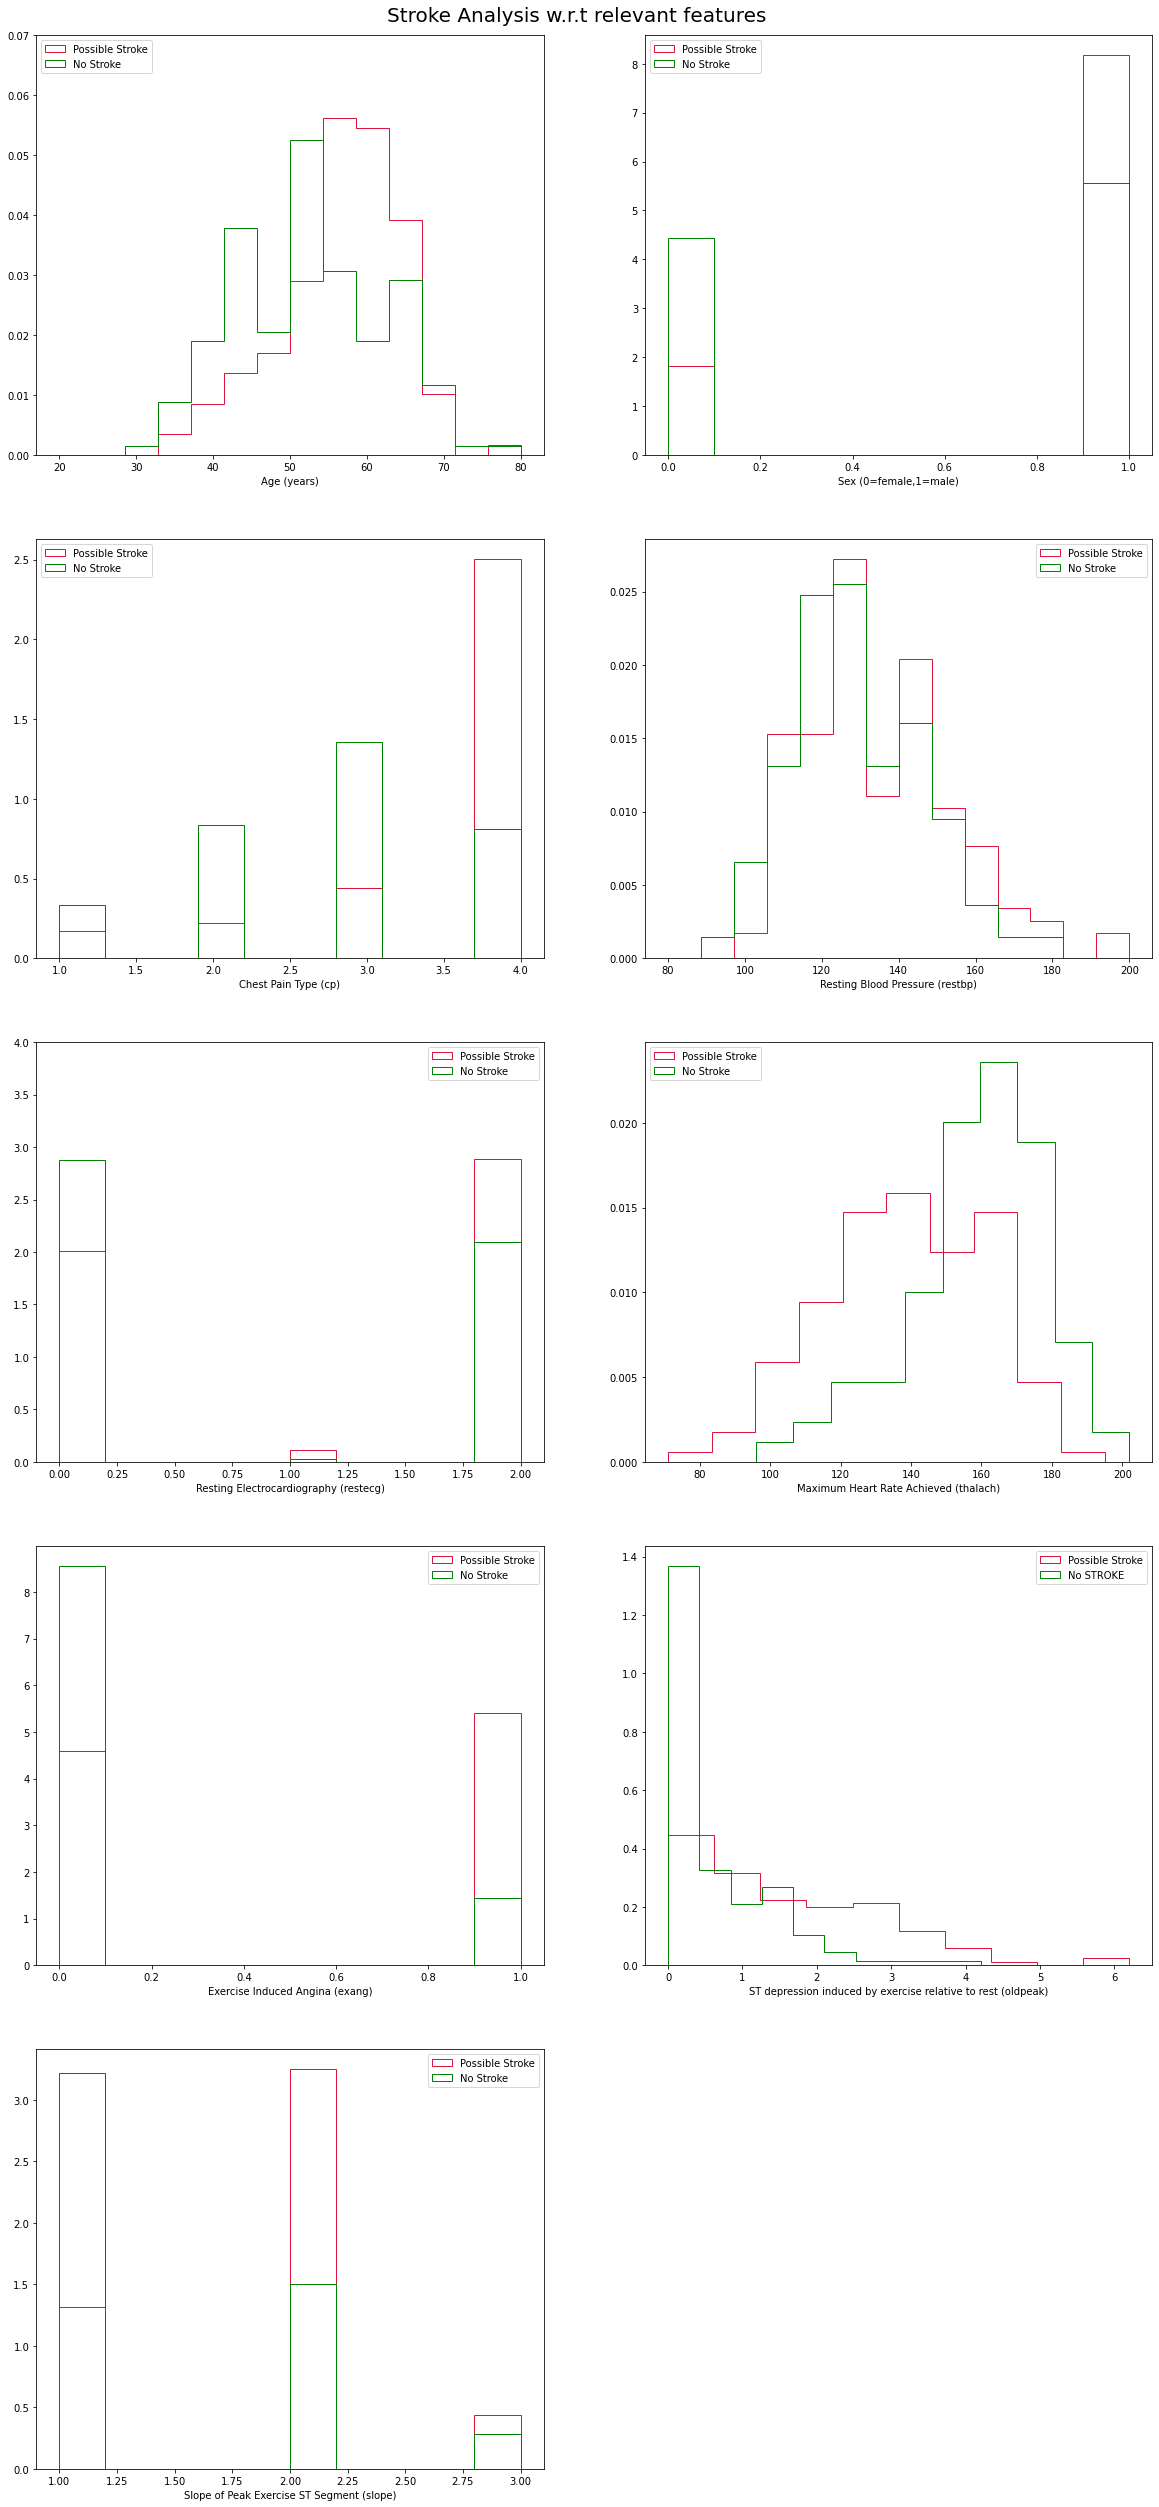

In [286]:
#Feature Distribution analysed for Possible Stroke nd No-Stroke
fig, axes = plt.subplots( nrows=5, ncols=2, figsize=(20,40) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Stroke Analysis w.r.t relevant features", fontsize=20)
bins = np.linspace(20, 80, 15)
axes[0,0].hist(data[data.NUM>0].Age.tolist(),bins,color=["crimson"],histtype="step",label="Possible Stroke",density=True)
axes[0,0].hist(data[data.NUM==0].Age,bins,color=["green"],histtype="step",label="No Stroke",density=True)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylim(0.0,0.070)
axes[0,0].legend(prop={'size': 10},loc="upper left")

axes[0,1].hist(data[data.NUM>0].Sex.tolist(),color=["crimson"],histtype="step",label="Possible Stroke", density=True)
axes[0,1].hist(data[data.NUM==0].Sex,color=["green"],histtype="step",label="No Stroke", density=True)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].legend(prop={'size': 10},loc="upper left")

axes[1,0].hist(data[data.NUM>0].CP.tolist(),color=["crimson"],histtype="step",label="Possible Stroke", density=True)
axes[1,0].hist(data[data.NUM==0].CP,color=["green"],histtype="step",label="No Stroke", density=True)
axes[1,0].set_xlabel("Chest Pain Type (cp)")
axes[1,0].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)

axes[1,1].hist(data[data.NUM>0].TRESTTBPS.tolist(),bins,color=["crimson"],histtype="step",label="Possible Stroke", density=True)
axes[1,1].hist(data[data.NUM==0].TRESTTBPS,bins,color=["green"],histtype="step",label="No Stroke", density=True)
axes[1,1].set_xlabel("Resting Blood Pressure (restbp)")
axes[1,1].legend(prop={'size': 10},loc="upper right")

axes[2,0].hist(data[data.NUM>0].RESTECG.tolist(),color=["crimson"],histtype="step",label="Possible Stroke", density=True)
axes[2,0].hist(data[data.NUM==0].RESTECG,color=["green"],histtype="step",label="No Stroke", density=True)
axes[2,0].set_xlabel("Resting Electrocardiography (restecg)")
axes[2,0].set_ylim(0.0,4.0)
axes[2,0].legend(prop={'size': 10},loc="upper right")

axes[2,1].hist(data[data.NUM>0].THALACH.tolist(),color=["crimson"],histtype="step",label="Possible Stroke", density=True)
axes[2,1].hist(data[data.NUM==0].THALACH,color=["green"],histtype="step",label="No Stroke", density=True)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved (thalach)")
axes[2,1].legend(prop={'size': 10},loc="upper left")

axes[3,0].hist(data[data.NUM>0].EXANG.tolist(),color=["crimson"],histtype="step",label="Possible Stroke", density=True)
axes[3,0].hist(data[data.NUM==0].EXANG,color=["green"],histtype="step",label="No Stroke", density=True)
axes[3,0].set_xlabel("Exercise Induced Angina (exang)")
axes[3,0].legend(prop={'size': 10},loc="upper right")

axes[3,1].hist(data[data.NUM>0].OLDPEAK.tolist(),color=["crimson"],histtype="step",label="Possible Stroke", density=True)
axes[3,1].hist(data[data.NUM==0].OLDPEAK,color=["green"],histtype="step",label="No STROKE", density=True)
axes[3,1].set_xlabel("ST depression induced by exercise relative to rest (oldpeak)")
axes[3,1].legend(prop={'size': 10},loc="upper right")

axes[4,0].hist(data[data.NUM>0].SLOPE.tolist(),color=["crimson"],histtype="step",label="Possible Stroke", density=True)
axes[4,0].hist(data[data.NUM==0].SLOPE,color=["green"],histtype="step",label="No Stroke", density=True)
axes[4,0].set_xlabel("Slope of Peak Exercise ST Segment (slope)")
axes[4,0].legend(prop={'size': 10},loc="upper right")

axes[4,1].axis("off")
plt.show()

In [287]:
data1 = data.copy()
data1["NUM"].replace(to_replace=[1,2,3,4],value=1,inplace=True)
data1 = data1.rename(columns = {"NUM":"NUM1"})
new_columns_1 = ["Age", "Sex", "TRESTTBPS", "THALACH", "RESTECG" 
                 "EXANG", "OLDPEAK", "NUM1", "CP", "SLOPE"]

print ('\nNumber of patients in dataset: %i, with possibility of stroke: %i, no stroke: %i\n' \
      % (len(data1.index),len(data1[data1.NUM1==1].index),len(data1[data1.NUM1==0].index)))
print (data1.head())
print (data1.describe())


Number of patients in dataset: 297, with possibility of stroke: 137, no stroke: 160

   Age  Sex  CP  TRESTTBPS  RESTECG  THALACH  EXANG  OLDPEAK  SLOPE  NUM1
0   63    1   1        145        2      150      0      2.3      3     0
1   67    1   4        160        2      108      1      1.5      2     1
2   67    1   4        120        2      129      1      2.6      2     1
3   37    1   3        130        0      187      0      3.5      3     0
4   41    0   2        130        2      172      0      1.4      1     0
              Age         Sex          CP  ...     OLDPEAK       SLOPE        NUM1
count  297.000000  297.000000  297.000000  ...  297.000000  297.000000  297.000000
mean    54.542088    0.676768    3.158249  ...    1.055556    1.602694    0.461279
std      9.049736    0.468500    0.964859  ...    1.166123    0.618187    0.499340
min     29.000000    0.000000    1.000000  ...    0.000000    1.000000    0.000000
25%     48.000000    0.000000    3.000000  ...    0.000

In [289]:
num_training_size = int(data.shape[0]*.7)
print('Training size: {}. Test size: {}.'.format(num_training_size, \
                                                                   data.shape[0]-num_training_size))

y = data1.NUM1
X = data1.drop('NUM1', axis=1)
print("Cleveland dataset now has {} data points with {} variables each.".format(*data.shape))  

Training size: 207. Test size: 90.
Cleveland dataset now has 297 data points with 10 variables each.


In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, shuffle=True)
#we can get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features: ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of datapoints:  207
Number of features:  9


Test Set:
Number of datapoints:  90
Number of features:  9


In [292]:
# and we can verify the stratifications using np.bincount
print('Labels counts in y:', np.bincount(y))
print('Percentage of class zeroes in class_y',np.round(np.bincount(y)[0]/len(y)*100))

print("\n")
print('Labels counts in y_train:', np.bincount(y_train))
print('Percentage of class zeroes in y_train',np.round(np.bincount(y_train)[0]/len(y_train)*100))

print("\n")
print('Labels counts in y_test:', np.bincount(y_test))
print('Percentage of class zeroes in y_test',np.round(np.bincount(y_test)[0]/len(y_test)*100))

Labels counts in y: [160 137]
Percentage of class zeroes in class_y 54.0


Labels counts in y_train: [112  95]
Percentage of class zeroes in y_train 54.0


Labels counts in y_test: [48 42]
Percentage of class zeroes in y_test 53.0


In [0]:
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [301]:
# this creates our dummy classifier, and the value we pass in to the strategy parameter dtermn
dummy = DummyClassifier(strategy='uniform', random_state=1)
# "Train" model
dummy.fit(X_train_std, y_train)
# from this, we can generate a set of predictions on our unseen features, X_test
dummy_predictions = dummy.predict(X_test_std)
print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test,dummy_predictions))
print ('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,dummy_predictions))


Classification report on full data set:
              precision    recall  f1-score   support

           0       0.51      0.44      0.47        48
           1       0.45      0.52      0.48        42

    accuracy                           0.48        90
   macro avg       0.48      0.48      0.48        90
weighted avg       0.48      0.48      0.48        90


Confusion matrix:
[[21 27]
 [20 22]]


In [328]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)
y_pred_lr = logreg.predict(X_test_std)
print(y_pred_lr)
print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test,y_pred_lr))
print ('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred_lr))
print ('\nCross_val_score:')
print(cross_val_score(logreg, X, y, cv=5, scoring="accuracy").mean())
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("\nThe accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

[0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1
 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1]

Classification report on full data set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        48
           1       0.80      0.86      0.83        42

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90


Confusion matrix:
[[39  9]
 [ 6 36]]

Cross_val_score:
0.7608474576271187

The accuracy score achieved using Logistic Regression is: 83.33 %


In [329]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
# we will optimise logistics regression 
# we can create hyperparameters as a list, as in type regularization penalty 
penalty = ['l1', 'l2']

# or as a distribution of values to sample from -'C' is the hyperparameter controlling the size of the regularisation penelty 
C = uniform(loc=0, scale=4)

# we need to pass these parameters as a dictionary of {param_name: values}
hyperparameters = dict(C=C, penalty=penalty)

# we instantiate our model
randomizedsearch = RandomizedSearchCV(logistic, hyperparameters, random_state=1, 
                                      n_iter=100, cv=5, verbose=0, n_jobs=-1)
# and fit it to the data 
best_model = randomizedsearch.fit(X, y)

# and we can call this method to return the best parameters the search returned
print("Logistic Regression Optimised Score")
print(best_model.best_estimator_)

print ('\nCross_val_score:')
cross_val_score(randomizedsearch, X, y, cv=5, scoring="accuracy").mean()

Logistic Regression Optimised Score
LogisticRegression(C=3.87304630287759, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Cross_val_score:


0.7609039548022597

In [337]:
#Random forest with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_std, y_train)

y_pred_rf = rf.predict(X_test_std)
print(y_pred_rf)

print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test,y_pred_rf))
print ('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred_rf))

score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("\nThe accuracy score achieved using Randomforest Classifier is: "+str(score_rf)+" %")

print("Accuracy on training set: {:.3f}".format(rf.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test_std, y_test)))

[0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1]

Classification report on full data set:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.79      0.81      0.80        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90


Confusion matrix:
[[39  9]
 [ 8 34]]

The accuracy score achieved using Randomforest Classifier is: 81.11 %
Accuracy on training set: 1.000
Accuracy on test set: 0.811


In [336]:
#prune depth of trees
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train_std, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test_std, y_test)))

Accuracy on training set: 0.836
Accuracy on test set: 0.833


In [332]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train_std, y_train)

y_pred_dt = dt.predict(X_test_std)
print(y_pred_dt)

print ('\nClassification report on full data set:')
print(metrics.classification_report(y_test,y_pred_dt))
print ('\nConfusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred_dt))

score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("\nThe accuracy score achieved using DecissionTree Classifier is: "+str(score_dt)+" %")

print("Accuracy on training set: {:.3f}".format(dt.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test_std, y_test)))

[0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1]

Classification report on full data set:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        48
           1       0.77      0.71      0.74        42

    accuracy                           0.77        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.77      0.77      0.77        90


Confusion matrix:
[[39  9]
 [12 30]]

The accuracy score achieved using DecissionTree Classifier is: 76.67 %
Accuracy on training set: 0.797
Accuracy on test set: 0.767


In [0]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['Decision Trees', 'Logistic Regression','Random Forests']

# list of algorithms with parameters
models = [DecisionTreeClassifier(), LogisticRegression(), 
         RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train_std, y_train)
    score = model.score(X_test_std, y_test)
    accuracy.append(score)

In [334]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
Decision Trees,0.755556
Logistic Regression,0.833333
Random Forests,0.811111
